# Introduction 
Welcome to my star wars notebook! In this notebook, we'll take a look at some star wars fan survey data, collected in 2014, before the release of Star Wars: The Force Awakens. This dataset can be downloaded from [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). It contains questions like:

- Favorite movie?

- Are you a Star Trek fan? 

- Who shot first?

We'll be exploring this dataset primarily from the perspective of data cleaning, but we'll also do some data analysis and visualization. In particular, after thoroughly cleaning the data, we'll investigate, among other things, the following questions: 

- What are Treky's favorite star wars movie? 

- Who hates Jar Jar the most? 

- Where do star wars fans live? 

I hope you enjoy this notebook. Without further ado, "begin, we shall!"

![takoff](photos/star-wars-hyperspeed.gif)

# About the Data

We'll begin by reading this dataset into a pandas dataframe, and checking out the first few rows.

In [1]:
import pandas as pd
df = pd.read_csv('data/survey.csv', encoding="ISO-8859-1")
pd.set_option('display.max_columns', None)
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We see that the column names actually correspond to the questions asked. While some of the names need no explaining, some are slightly cryptic, such as "Unamed: 17." We'll write each question out individually, and explain the crpytic names. 

![no meaning](photos/no_meaning_to_me.gif)

| Question Number | Question Description |
| --- | --- |
| Question 1 | Have you seen any of the 6 films of the star wars franchise?|
| Question 2 | Do you consider yourself to be a fan of the Star Wars film franchise? |
| Question 3 | Which of the following Star Wars films have you seen? Please select all that apply (see below for an explanation)|
| Question 4 | Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film (see below for an explanation) |
| Question 5 | Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her (see below for an explanation)|
| Question 6 |  Which character shot first? |
| Question 7 | Are you familiar with the Expanded Universe? |
| Question 8 | Do you consider yourself to be a fan of the Expanded Universe? |
| Question 9 | Do you consider yourself to be a fan of the Star Trek franchise? |
| Question 10 | Gender |
| Question 11 | Age |
| Question 12 | Household Income |
| Question 13 | Education |
| Question 14 | Location (Census Region)| 

<a id=’question_3’></a>
### Questions 3-5 Explained
- For Question 3, respondents were asked which films they have seen. The answer in the third column indicates whether the respondent has seen "Star Wars: The Phantom Menace," while the answer in Unnamed 4-8 indicates whether the respondent has seen Episode II-VI, repsectively. 


- For Question 4, respondents were asked to rank their movies from 1 (favorite film) to 6 (least favorite film). An answer in Unamed 10-14 indicates the ranking of Episode II-IV, respectively, while an answer in the column of the question indicates the ranking for "Star Wars: The Phantom Menace."


- For Question 5, respondents were asked which characters they viewed favorably, unfavorably, or unfamiliar with. To see which characters each column corresponds to, let's take a closer look at the 0th row of the dataframe. 

In [2]:
df.iloc[:,15:29].head(1)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


We see that the 0th row doesn't correspond to a survey respondent. Rather, it tells us the character to whom each column refers. Let's just record this information in a table. 

| Column Name | Character |
|-------------|-----------|
| 	Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. | Han Solo |
| Unnamed: 16 | Luke Skywalker |
| Unnamed: 17 | Princess Leia Organa |
| Unnamed: 18 | Anakin Skywalker |
| Unnamed: 19 | Obi-Wan Kenobi |
| Unnamed: 20 | Emperor Palpatine |
| Unnamed: 21 | Darth Vader |
| Unnamed: 22 | Lando Calrissian|
| Unnamed: 23 | Boba Fett|
| Unnamed: 24 | C-3PO|
| Unnamed: 25 | R2D2|
| Unnamed: 26 | Jar-Jar Binks |
| Unnamed: 27 | Padme Amidala |
| Unnamed: 28 | Yoda |


We'll rename the column names to make them make more sense in the next section. This concludes all the neccesary background information about the dataset. 

# Data Cleaning

 It looks like Luke didn't pick up any automatic data cleaners at the Tosche Station! In this section, we give the dataset a thorough cleansing. We begin renaming a few columns to make interpreting the dataset more intuitive, as well as dropping any duplicates or irrelevant rows. After this we'll finish the cleaning process by going through each column. 

![toche station](photos/luke-skywalker-im-going-to-tosche-station.gif)

## Renaming Columns and Initial Row Drops
We alreaady noted that  columns 3-8 correspond to which star wars movies the respondent has seen. We'll begin by changing those column names to something more descriptive. 

In [3]:
df = df.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 
'Unnamed: 4': 'seen_2', 
'Unnamed: 5': 'seen_3',
'Unnamed: 6': 'seen_4',
'Unnamed: 7': 'seen_5',
'Unnamed: 8': 'seen_6'} )
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Similarly, columns 9-14 correspond to the ranking assigned by the respondent to episodes 1-6. We'll rename this columns as well, using a similar convention. 

In [4]:
df = df.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
'Unnamed: 10': 'rank_2',
'Unnamed: 11': 'rank_3',
'Unnamed: 12': 'rank_4',
'Unnamed: 13': 'rank_5',
'Unnamed: 14': 'rank_6'})
df.head(0)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


The last set of columns to rename is columns 15-28. Since these columns indicate how the repondent feels about a character, we'll rename these columns with "vibe," as well as something to indicate which chracter we're talking about.

In [5]:
df = df.rename(columns = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'han_vibe',
'Unnamed: 16': 'luke_vibe',
'Unnamed: 17': 'leia_vibe',
'Unnamed: 18': 'anakin_vibe',
'Unnamed: 19': 'obi_wan_vibe',
'Unnamed: 20': 'palpatine_vibe',
'Unnamed: 21':'vader_vibe',
'Unnamed: 22': 'lando_vibe',
'Unnamed: 23': 'boba_vibe',
'Unnamed: 24': 'c3po_vibe',
'Unnamed: 25': 'r2_vibe',
'Unnamed: 26': 'jar_jar_vibe',
'Unnamed: 27': 'padme_vibe',
'Unnamed: 28': 'yoda_vibe'})
df.head(0)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


The only thing that remains to be done for the remaining columns is to summarize each question, and get all columns in the same format. We'll be able to drop the RespondentID column after doing any row drops, so we don't need to rename that column. Columns 2 and 3 can be renamed to briefly summarize the content of the question, as can the last few columns. We do this in the following cell. 

In [6]:
df = df.rename(columns = {
    'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'fan',
    'Which character shot first?': 'han_shot',
    'Are you familiar with the Expanded Universe?': 'expanded_familiar',
    'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½': 'expanded_fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'treky',
    'Household Income': 'income',
    'Location (Census Region)': 'location'
})
df.columns = df.columns.str.lower()
df.head(0)

,respondentid,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location


Now, our column names don't take up so much space! Before we remove the respondentid column, we can use this to check for any duplicates. 

In [7]:
df['respondentid'].duplicated(False).value_counts()

False    1187
Name: respondentid, dtype: int64

The above code indicates that each respondent has a unique id, and hence there are no accidental duplicates. We have no use for this column anymore, so we'll drop it from the dataframe. 

![do-it](photos/star-wars-do-it.gif)

In [8]:
df = df.drop(columns = 'respondentid')
df.head(1)

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
0,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


We notice from the above cell that, since we renamed each column appropriately, we no longer need row 0. So, we can remove it.

In [9]:
df = df.drop([0])
df.head()

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
1,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


At this point, the columns are renamed and irrelevant rows are dropped. In the next section, we'll start to clean the data column by column. 
## Columns 1 and 2

Let's begin by taking a look at all the unique answers in the first column, and checking for any missing values.

In [10]:
df['seen_any'].value_counts(dropna = False)

Yes    936
No     250
Name: seen_any, dtype: int64

We see that everyone answered this question either yes or no. Since boolean data types are much easier to work with, we'll go ahead and convert these answers to boolean. 

In [11]:
df['seen_any'] = df['seen_any'].map({'Yes': True,
'No': False
})
df['seen_any'] = df['seen_any'].astype('bool')

Now, let's look at the values in the second column.

In [12]:
df['fan'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: fan, dtype: int64

First, let's do the same and convert the "Yes" and "No" to boolean values.

In [13]:
df['fan'] = df['fan'].map({'Yes': True,
'No': False
})
df['fan'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: fan, dtype: int64

This column has a lot of missing values. Luckily, we can use the previous column to help fill in some of these values. For instance, if someone has not seen any star wars movies left the second question blank, then its safe to assume that they aren't a fan. Let's correct this and check how many missing values remain. To do this, let's check the unique values in the second column among only those who answered "No" to the first question. 

In [14]:
df.loc[df.loc[:,'seen_any'] == False,'fan'].value_counts(dropna = False)

NaN    250
Name: fan, dtype: int64

It appears from the above that each respondent who has seen no star wars movies, left the second question blank. This makes sense. Let's go ahead and change those values only to "False," as it's safe to assume that they aren't fans.

In [15]:
import numpy as np
df.loc[df.loc[:,'seen_any'] == False, 'fan'] = df.loc[df.loc[:,'seen_any'] == False, 'fan'].apply(lambda x: False if pd.isna(x) else x).copy()
df['fan'].value_counts(dropna = False)

True     552
False    534
NaN      100
Name: fan, dtype: int64

We see that now there are only 100 missing values here, and each one corresponds to those who have seen at least 1 star wars movie. Let's take a closer look at the other answers of these respondents. 

In [16]:
df[df['fan'].isnull()].head(5)

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems from the first few rows that people in this group left the rest of the survey blank. If this is the case, then all these respondents are candidates for dropping from the dataframe. Let's first check that this is indeed the case.

In [17]:
df[df['fan'].isnull()].describe()

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
count,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We've now confirmed that the 100 missing values in column 2 correspond to people who only answered the first question. Let's go ahead and drop these from the dataframe. 

In [18]:
df = df.dropna(subset = ['fan']).copy()

Let's also change the data type of the fan column to boolean.

In [19]:
df['fan'] = df['fan'].astype('bool')

The first two columns are now converted to boolean and completely free of missing values. Now, we'll move onto the next few columns.

## Columns 3-8

These columns contain information regarding which movies the respondents have seen. Let's use pandas.DataFrame.() to get an idea of what kind of answers respondents gave. 

In [20]:
seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
for col in seen_cols:
    print(df.loc[:,col].value_counts(dropna = False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         413
Name: seen_1, dtype: int64
Star Wars: Episode II  Attack of the Clones    571
NaN                                            515
Name: seen_2, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
NaN                                            536
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  479
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             328
Name: seen_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         348
Name: seen_6, dtype: int64


These columns will be fairly easy to clean. NaN values in this case mean the respondent hasn't seen the corresponding movie. We'll be able to fix these columns using pandas.Series.map().

![too easy](photos/star-wars-general-grievous.gif)

In [21]:
for col in seen_cols:
    df[col] = df[col].apply(lambda x: False if pd.isna(x) else True)
    print(df.loc[:,col].value_counts(dropna = False))

True     673
False    413
Name: seen_1, dtype: int64
True     571
False    515
Name: seen_2, dtype: int64
True     550
False    536
Name: seen_3, dtype: int64
True     607
False    479
Name: seen_4, dtype: int64
True     758
False    328
Name: seen_5, dtype: int64
True     738
False    348
Name: seen_6, dtype: int64


We've changed the values in these columns, so all thats left is to convert each one to boolean datatype. We do this in the cell below.

In [22]:
for col in seen_cols:
    df.loc[:,col] = df.loc[:,col].astype('bool')

## Columns 9 - 14
Now, we'll clean the columns containing information about movie rankings. Let's begin by checking the unique values.

In [23]:
rank_cols = ['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']
for col in rank_cols:
    print(df.loc[:,col].value_counts(dropna = False))

NaN    251
4      237
6      168
3      130
1      129
5      100
2       71
Name: rank_1, dtype: int64
5      300
NaN    250
4      183
2      116
3      103
6      102
1       32
Name: rank_2, dtype: int64
NaN    251
6      217
5      203
4      182
3      150
2       47
1       36
Name: rank_3, dtype: int64
NaN    250
1      204
6      161
2      135
4      130
3      127
5       79
Name: rank_4, dtype: int64
1      289
NaN    250
2      235
5      118
3      106
4       47
6       41
Name: rank_5, dtype: int64
NaN    250
2      232
3      220
1      146
6      145
4       57
5       36
Name: rank_6, dtype: int64


The unique values are simply rankings from 1 to 6, as well as missing values. It appears there are about 250 missing values for each answer, with the expception of Episodes I and III, with 251 missing values. Let's take a closer look at this group. 

In [24]:
df[df['rank_1'].isnull()].describe()

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
count,251,251,251,251,251,251,251,251,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,241,227,227,184,221,226
unique,2,1,1,1,1,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,2,2,4,5,5,9
top,False,False,False,False,False,False,False,False,NaN,3,2,5,1,4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Somewhat favorably,Very unfavorably,Very favorably,Unfamiliar (N/A),NaN,Very favorably,Very favorably,NaN,NaN,Very favorably,I don't understand this question,No,NaN,No,Female,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,250,251,251,251,251,251,250,251,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,NaN,NaN,1,1,1,NaN,229,153,77,61,74,47


It seems from the above that the 250 people who have not seen any star wars movies decided to not rank them. This makes sense. Let's look at the one excpetion: the person who has seen a star wars movie, but is among the group who didn't rank all of the movies.

In [25]:
df[df['rank_1'].isnull() & df['seen_any']]

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
890,True,False,False,False,False,False,True,False,NaN,3,2,5,1,4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Somewhat favorably,Very unfavorably,Very favorably,Unfamiliar (N/A),NaN,Very favorably,Very favorably,NaN,NaN,Very favorably,I don't understand this question,No,NaN,No,Female,> 60,"$50,000 - $99,999",Graduate degree,New England


This person has only seen episode 5, but ranked all of the movies, except Episode I. In this case, it makes most sense to fill the rank for Episode I as 6. 

In [26]:
df.loc[df['rank_1'].isnull() & df['seen_any'],'rank_1'] = 6

Now, let's look at the person who didn't rank Episode III.

In [27]:
df[df['seen_any'] & df['rank_3'].isnull()]

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
385,True,True,True,True,True,True,True,True,1,2,NaN,4,5,3,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),NaN,Very favorably,Somewhat unfavorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Han,No,NaN,Yes,Male,30-44,"$100,000 - $149,999",Bachelor degree,Middle Atlantic


This person has seen all movies, and left Episode III blank. It seems likely that they knew their implied answer was 6, since all other ranks are there. Let's fill this value with 6 as well.

In [28]:
df.loc[df['seen_any'] & df['rank_3'].isnull(),'rank_3'] = 6

Now, our dataframe contains people who ranked all movies, and then 250 people who have not seen any star wars movies, and hence did not rank them. These columns should now be clean enough for analysis. 

Though technically there are some missing values in these columns, when we analyze the data, we only care about the rankings of people who have actually seen a star wars movie. Hence, creating a dataframe for only those who have seen a movie will allow us to analyze these columns easily. 

## Columns 15 - 28



Let's now take a look at the columns regarding characters. There's a lot of output, so we'll only check unique calues for the first few characters.

In [29]:
vibe_cols = df.columns[14:28].tolist()
for col in vibe_cols[0:3]:
    print(df[col].value_counts(dropna = False))

Very favorably                                 610
NaN                                            257
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: han_vibe, dtype: int64
Very favorably                                 552
NaN                                            255
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: luke_vibe, dtype: int64
Very favorably                                 547
NaN                                            255
Somewhat favorably                             210
Neither favorably nor unfavorably (neutral)     48
Somewhat unfavorably   

The first thing we'll do is rename the answers to be a little more readable. 

In [30]:
for col in vibe_cols:
    df.loc[:,col] = df.loc[:,col].map({'Unfamiliar (N/A)': 'unfamiliar',
    'Neither favorably nor unfavorably (neutral)': 'neutral',
    'Somewhat favorably': 'somewhat favorably', 
    'Somewhat unfavorably':'somewhat unfavorably',
    'Very favorably': 'very favorably',
    'Very unfavorably': 'very unfavorably'})

for col in vibe_cols[0:3]:
    print(df[col].value_counts(dropna = False))

very favorably          610
NaN                     257
somewhat favorably      151
neutral                  44
unfamiliar               15
somewhat unfavorably      8
very unfavorably          1
Name: han_vibe, dtype: int64
very favorably          552
NaN                     255
somewhat favorably      219
neutral                  38
somewhat unfavorably     13
unfamiliar                6
very unfavorably          3
Name: luke_vibe, dtype: int64
very favorably          547
NaN                     255
somewhat favorably      210
neutral                  48
somewhat unfavorably     12
unfamiliar                8
very unfavorably          6
Name: leia_vibe, dtype: int64


Recall that the repondents who haven't seen any movies did not fill out these columns. Hence, these are NaN's that can safely be moved to "Unfamiliar." We can use the describe method on the respondents who haven't seen any movies to check this.

In [31]:
df[~df['seen_any']].describe()

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
count,250,250,250,250,250,250,250,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,226,226,183,220,225
unique,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,5,5,9
top,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Female,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,250,250,250,250,250,250,250,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228,152,76,60,74,47


Let's convert these to "unfamiliar."

In [32]:
for col in vibe_cols:
    df.loc[~df.loc[:,'seen_any'], col] = df.loc[
            ~df.loc[:,'seen_any'], col].map(
                {np.NaN: 'unfamiliar'})

Now, we can check the number of missing values in these columns after the above correction.

In [33]:
for col in vibe_cols:
    nan_number = df[col].isnull().sum()
    print(f"Number of NaN's in {col}: {nan_number}")

Number of NaN's in han_vibe: 7
Number of NaN's in luke_vibe: 5
Number of NaN's in leia_vibe: 5
Number of NaN's in anakin_vibe: 13
Number of NaN's in obi_wan_vibe: 11
Number of NaN's in palpatine_vibe: 22
Number of NaN's in vader_vibe: 10
Number of NaN's in lando_vibe: 16
Number of NaN's in boba_vibe: 24
Number of NaN's in c3po_vibe: 9
Number of NaN's in r2_vibe: 6
Number of NaN's in jar_jar_vibe: 15
Number of NaN's in padme_vibe: 22
Number of NaN's in yoda_vibe: 10


Notice that the number of missing values tends to be smaller for well known characters, like Luke and Leia, and higher for more obscure characters, like Padme, Boba, and Palpatine. 

In this case, it seems that there are two natural ways to proceed. The first way is to assume that the remaining missing values can be converted to  "unfamiliar," since a respondent may simply not answer a question if they don't know the character. The other, more standard approach, would be to fill each missing value with the mode. Before choosing which approach to use, let's take a closer look at the respondents who left 'padme_vibe' blank.

In [34]:
df.loc[df.loc[:,'padme_vibe'].isnull(),:]

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
34,True,False,False,True,True,False,False,False,6,1,2,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Han,No,NaN,No,Male,18-29,"$50,000 - $99,999",High school degree,Mountain
62,True,True,False,False,False,True,False,False,1,2,3,4,5,6,NaN,somewhat unfavorably,somewhat favorably,NaN,somewhat unfavorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greedo,No,NaN,Yes,Male,30-44,"$100,000 - $149,999",Graduate degree,Pacific
89,True,False,True,True,True,False,True,True,1,4,3,6,5,2,very favorably,somewhat favorably,somewhat favorably,neutral,somewhat favorably,neutral,neutral,neutral,somewhat unfavorably,neutral,somewhat favorably,somewhat unfavorably,NaN,very favorably,Greedo,Yes,No,Yes,Male,> 60,"$100,000 - $149,999",Graduate degree,East North Central
109,True,False,False,False,False,False,True,False,2,3,4,5,1,6,NaN,very favorably,very favorably,NaN,very favorably,NaN,very unfavorably,NaN,NaN,very favorably,very favorably,very favorably,NaN,NaN,I don't understand this question,No,NaN,No,Male,> 60,"$25,000 - $49,999",Some college or Associate degree,South Atlantic
126,True,False,False,False,False,True,True,True,4,5,6,2,3,1,very favorably,somewhat favorably,somewhat favorably,NaN,very favorably,NaN,very unfavorably,NaN,NaN,somewhat favorably,somewhat favorably,NaN,NaN,very favorably,I don't understand this question,No,NaN,No,Female,> 60,"$25,000 - $49,999",Graduate degree,East North Central
199,True,False,False,False,False,False,True,True,3,4,5,2,6,1,very favorably,very favorably,very favorably,somewhat favorably,very favorably,unfamiliar,very favorably,unfamiliar,NaN,neutral,neutral,somewhat favorably,NaN,very favorably,I don't understand this question,No,NaN,No,Male,45-60,"$150,000+",Some college or Associate degree,East North Central
210,True,False,True,True,True,True,True,True,3,4,5,6,1,2,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,very favorably,very favorably,very favorably,NaN,very favorably,Greedo,No,NaN,No,Male,18-29,NaN,Some college or Associate degree,Pacific
257,True,False,False,True,True,False,False,False,6,5,3,1,4,2,very favorably,very favorably,somewhat favorably,very unfavorably,very favorably,unfamiliar,unfamiliar,NaN,NaN,very favorably,very favorably,NaN,NaN,very favorably,I don't understand this question,No,NaN,No,Female,45-60,"$25,000 - $49,999",Graduate degree,Mountain
329,True,True,False,False,True,False,True,True,5,4,3,6,1,2,very favorably,very favorably,NaN,NaN,very favorably,NaN,very favorably,very favorably,NaN,very favorably,very favorably,NaN,NaN,very favorably,I don't understand this question,No,NaN,Yes,Female,> 60,"$25,000 - $49,999",Some college or Associate degree,East South Central
366,True,False,True,True,True,False,False,False,1,2,3,4,5,6,somewhat unfavorably,very unfavorably,very unfavorably,very unfavorably,very unfavorably,somewhat unfavorably,somewhat favorably,NaN,NaN,very unfavorably,very unfavorably,NaN,NaN,very unfavorably,I don't understand this question,Yes,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,West North Central


After looking at the above, it seems that the best approach is to use a compromise. Notice that many of the respondents who left 'padme_vibe' blank, also answered 'I don't understand this question' in the han_shot column. If you're also unfamiliar with the question asked in the 'han_shot' column, see the next subsection below!

It would make most sense for these respondents to fill in 'unfamiliar.' However, for those who answered the han_shot question, it seems less likely that they would be unfamiliar with a character. It would make most sense, in this case, to fill in the mode. We do this in the following code cell. 

In [35]:
for col in vibe_cols:
    df.loc[df.loc[:,'han_shot'] == "I don't understand this question", col] = df.loc[df.loc[:,'han_shot'] == "I don't understand this question", col].fillna('unfamiliar')
    df.loc[df.loc[:,'han_shot'] == "Han", col] = df.loc[df.loc[:,'han_shot'] == "Han", col].fillna(df.loc[:,col].mode()[0]) 
    df.loc[df.loc[:,'han_shot'] == "Greedo", col] = df.loc[df.loc[:,'han_shot'] == "Greedo", col].fillna(df.loc[:,col].mode()[0])   


Now let's check how many missing values remain. 

In [36]:
for col in vibe_cols:
    nan_number = df[col].isnull().sum()
    print(f"Number of NaN's in {col}: {nan_number}")

Number of NaN's in han_vibe: 0
Number of NaN's in luke_vibe: 0
Number of NaN's in leia_vibe: 0
Number of NaN's in anakin_vibe: 0
Number of NaN's in obi_wan_vibe: 0
Number of NaN's in palpatine_vibe: 0
Number of NaN's in vader_vibe: 0
Number of NaN's in lando_vibe: 0
Number of NaN's in boba_vibe: 1
Number of NaN's in c3po_vibe: 0
Number of NaN's in r2_vibe: 0
Number of NaN's in jar_jar_vibe: 0
Number of NaN's in padme_vibe: 0
Number of NaN's in yoda_vibe: 0


There's one missing value remaining. Let's take a closer look. 

In [37]:
df[df['boba_vibe'].isnull()]

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
241,True,True,True,True,True,True,True,True,4,5,6,1,2,3,very favorably,very favorably,very favorably,somewhat favorably,neutral,neutral,neutral,somewhat unfavorably,NaN,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's fill this value with the mode. 

In [38]:
df.loc[df.loc[:,'boba_vibe'].isnull(),'boba_vibe'] = df.loc[df.loc[:,'boba_vibe'].isnull(),'boba_vibe'].fillna(df.loc[:,'boba_vibe'].mode()[0])
for col in vibe_cols:
    nan_number = df[col].isnull().sum()
    print(f"Number of NaN's in {col}: {nan_number}")


Number of NaN's in han_vibe: 0
Number of NaN's in luke_vibe: 0
Number of NaN's in leia_vibe: 0
Number of NaN's in anakin_vibe: 0
Number of NaN's in obi_wan_vibe: 0
Number of NaN's in palpatine_vibe: 0
Number of NaN's in vader_vibe: 0
Number of NaN's in lando_vibe: 0
Number of NaN's in boba_vibe: 0
Number of NaN's in c3po_vibe: 0
Number of NaN's in r2_vibe: 0
Number of NaN's in jar_jar_vibe: 0
Number of NaN's in padme_vibe: 0
Number of NaN's in yoda_vibe: 0


Now these columns are cleaned, and we're ready to move on to the next column. 

## Cleaning the "who shot first?" Column 

![han shot](photos/7ZZs.gif)

In case you're not aware, an encouter between Han Solo and Greedo in Episode IV, shown in the above giff, has been the source of much debate for star wars fans ever since. The next column we'll look at asks whether Han Solo shot first, or Greedo shot first. Let's take a look at the answers. 

In [39]:
df['han_shot'].value_counts(dropna = False)

Han                                 325
I don't understand this question    306
NaN                                 258
Greedo                              197
Name: han_shot, dtype: int64

This column is already relatively clean. Let's take a closer look at the missing values. We notice that there are 258 missing values for this column. We suspect this corresponds largely to people who haven't seen any star wars movie. Let's double check this by counting how many people who haven't seen any star wars movies answered with NaN in this column. 

In [40]:
df[~df['seen_any']]['han_shot'].value_counts(dropna = False)

NaN    250
Name: han_shot, dtype: int64

We see that 250 of the 258 missing values in this column correspond the answers of people who haven't seen any star wars movies. In this case, it should be safe to assume that they don't understand the question. Let's look at the remaining 8. 

In [41]:
df[df['seen_any'] & df['han_shot'].isnull()].head(10)

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
241,True,True,True,True,True,True,True,True,4,5,6,1,2,3,very favorably,very favorably,very favorably,somewhat favorably,neutral,neutral,neutral,somewhat unfavorably,unfamiliar,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,True,True,True,True,True,True,True,True,4,5,6,3,1,2,very favorably,very favorably,very favorably,somewhat unfavorably,very favorably,unfamiliar,very unfavorably,very favorably,neutral,very favorably,very favorably,very favorably,very favorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,True,True,True,True,True,True,True,True,4,3,6,5,1,2,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,True,True,True,True,True,True,True,True,6,5,4,2,1,3,very favorably,somewhat favorably,very favorably,somewhat unfavorably,very favorably,somewhat unfavorably,somewhat favorably,neutral,neutral,very favorably,somewhat favorably,unfamiliar,very unfavorably,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,True,False,True,False,False,False,True,True,3,4,5,6,1,2,very favorably,very favorably,very favorably,very favorably,very favorably,neutral,very favorably,unfamiliar,unfamiliar,very favorably,very favorably,somewhat unfavorably,neutral,somewhat favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,True,True,True,True,True,True,True,True,6,3,2,5,1,4,very favorably,very favorably,very favorably,very favorably,very favorably,somewhat favorably,very favorably,somewhat favorably,somewhat favorably,very favorably,very favorably,somewhat favorably,very favorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,True,True,True,True,True,True,True,True,1,3,2,4,5,6,somewhat favorably,somewhat favorably,somewhat favorably,very favorably,somewhat favorably,very favorably,very favorably,neutral,very favorably,very favorably,somewhat favorably,neutral,very favorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,True,True,True,True,True,True,True,True,5,6,4,1,2,3,very favorably,very favorably,very favorably,very favorably,very favorably,somewhat favorably,very favorably,very favorably,somewhat unfavorably,very favorably,very favorably,somewhat unfavorably,somewhat unfavorably,very favorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interestingly, this group answered every question up until this question, and then they left the remaining blank. Moreover, all but one of these eight considers themself a fan of star wars. In this case, it seems the best thing to do is replace the missing values who aren't fans with not understanding, and then fill the remaining 7 missing values with the mode.

In [42]:
df.loc[~df.loc[:,'fan'],'han_shot'] = df.loc[~df.loc[:,'fan'],'han_shot'].apply(lambda x: "I don't understand this question" if pd.isna(x) else x)
df.loc[df.loc[:,'han_shot'].isnull(), 'han_shot'] = df.loc[df.loc[:,'han_shot'].isnull(), 'han_shot'].fillna(df.loc[:,'han_shot'].mode()[0])
df['han_shot'].value_counts(dropna = False)


I don't understand this question    564
Han                                 325
Greedo                              197
Name: han_shot, dtype: int64

The last thing to do is the map the answers to something more concise.

In [43]:
df['han_shot'] = df['han_shot'].str.lower()
df['han_shot'] = df['han_shot'].apply(lambda x: 'confused' if x == "i don't understand this question" else x)
df['han_shot'].value_counts(dropna = False)

confused    564
han         325
greedo      197
Name: han_shot, dtype: int64

That concludes this column's cleaning process. We're now ready to move on to the columns about the expanded star wars universe, and star trek!

## Cleaning the Expanded Universe and Star Trek Columns

![star trek](photos/spock-vulcan.gif)

In [44]:
df[['expanded_familiar', 'expanded_fan']].value_counts(dropna=False)

expanded_familiar  expanded_fan
No                 NaN             615
NaN                NaN             258
Yes                No              114
                   Yes              99
dtype: int64

We can, similar to before, assume that if one is not familiar with the expanded universe, then they are not a fan. Let's first map 'Yes' and 'No' to true and false, and then correct these missing values. 

In [45]:
for col in ['expanded_familiar', 'expanded_fan']:
    df[col] = df[col].map({'Yes': True, 'No': False})

df.loc[~df.loc[:,'expanded_familiar'].astype('bool'), 'expanded_fan'] = False

df[['expanded_familiar', 'expanded_fan']].value_counts(dropna=False)

expanded_familiar  expanded_fan
False              False           615
NaN                NaN             258
True               False           114
                   True             99
dtype: int64

The remaining 258 missing values are the exact as before: 250 of those who did not see any movies, and then 8 others. Let's just assume those who did not see a single star wars movies are unfamiliar with the expanded universe. This will complete the cleaning of these columns, and leave us with exactly 8 missing values in each.

In [46]:
for col in ['expanded_familiar', 'expanded_fan']:
    df.loc[~df.loc[:,'seen_any'].astype('bool'),col] = False 
df[['expanded_familiar', 'expanded_fan']].value_counts(dropna=False)

expanded_familiar  expanded_fan
False              False           865
True               False           114
                   True             99
NaN                NaN               8
dtype: int64

It seems safe to fill the remaining 8 missing values with the mode, since it is so much more frequent than any other answer. 

In [47]:
for col in ['expanded_familiar', 'expanded_fan']:
    df.loc[df.loc[:,col].isnull(),col] = df.loc[df.loc[:,col].isnull(),col].fillna(df.loc[:,col].mode()[0])

The last thing to do is to convert the column type to boolean. 

In [48]:
for col in ['expanded_familiar', 'expanded_fan']:
    df.loc[:,col] = df.loc[:,col].astype('bool')

Now, we can move onto the star trek column! Let's check these unique values.

In [49]:
df['treky'].value_counts(dropna = False)

No     641
Yes    427
NaN     18
Name: treky, dtype: int64

We'll impute these missing values to the mode, which is 'No.' 

In [50]:
df.loc[df.loc[:,'treky'].isnull(),'treky'] = df.loc[df.loc[:,'treky'].isnull(),'treky'].fillna(df.loc[:,'treky'].mode()[0]) 

The final thing to do is convert the column to boolean.

In [51]:
df['treky'] = df['treky'].map({'Yes': True,
'No': False})
df['treky'] = df['treky'].astype('bool')

## Cleaning the final few columns
We are on to cleaning the final few columns. These columns contain demographic information about the respondent himself/herself, rather than their opinion on star wars matters. Let's check on these columns all together with the describe method.

In [52]:
demographic_cols = ['gender','age','income','education','location']
for col in demographic_cols:
    print(df[col].value_counts(dropna = False))

Female    549
Male      497
NaN        40
Name: gender, dtype: int64
45-60    291
> 60     269
30-44    268
18-29    218
NaN       40
Name: age, dtype: int64
$50,000 - $99,999      298
NaN                    228
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: income, dtype: int64
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
NaN                                  50
Less than high school degree          7
Name: education, dtype: int64
East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
NaN                    43
East South Central     38
Name: location, dtype: int64


The last column we will address of these is income, since it has so many missing values. For gender, we'll fill the missing values proprtional to the current distribution. 

We can use .value_counts() on the non-missing values to get the current proportion of male-to-female. 

In [53]:
df.loc[:,'gender'].value_counts(normalize = True)

Female    0.524857
Male      0.475143
Name: gender, dtype: float64

So, we'll fill 52% of the missing data with female, and 48% with male. To do this, we'll use the function np.random_choice. 

In [54]:
df.loc[:,'gender'] = df.loc[:,'gender'].fillna(pd.Series(np.random.choice(['Female','Male'], 
                                        p=[0.52,0.48], size=len(df))))

Let's check the distribution of the filled data. 

In [55]:
df.loc[:,'gender'].value_counts(dropna = False)

Female    566
Male      518
NaN         2
Name: gender, dtype: int64

The remaining two won't affect the dataset too much, so we can just fill these both as Female. 

In [56]:
df.loc[df.loc[:,'gender'].isnull(),'gender'] = df.loc[df.loc[:,'gender'].isnull(),'gender'].fillna(df['gender'].mode()[0]) 

Now we'll move onto the age column. Since each category is almost equal, we're going to fill with the same strategy we used for gender. First, let's get the probabilites. 

In [57]:
df.loc[:,'age'].value_counts(normalize = True)

45-60    0.278203
> 60     0.257170
30-44    0.256214
18-29    0.208413
Name: age, dtype: float64

Now, just as before, we can use these probabilities to fill in the missing values. 

In [58]:
df.loc[:,'age'] = df.loc[:,'age'].fillna(pd.Series(np.random.choice(['18-29','30-44','45-60','> 60'], 
                                        p=[0.21,0.26,0.28,.25], size=len(df))))

Let's check the missing values for age now. 

In [59]:
df.loc[:,'age'].value_counts(dropna = False)

45-60    297
> 60     284
30-44    277
18-29    226
NaN        2
Name: age, dtype: int64

Just as before, we'll fill the remaining with the mode. 

In [60]:
df.loc[:, 'age'] = df.loc[:,'age'].fillna(df.loc[:,'age'].mode()[0])

Notice the space between ">" and "60." We'll remove this to avoid any confusion later on. 

In [61]:
df.loc[:,'age'] = df.loc[:,'age'].str.replace(' ', '')

We'll employ this same method just two more times to fill the missing values for education and location. 

In [62]:
df.loc[:, 'education'] = df.loc[:,'education'].str.lower()
df.loc[:, 'education'] = df.loc[:,'education'].str.replace(' degree','')

In [63]:
df.loc[:,'education'].value_counts(normalize=True)

some college or associate    0.316602
bachelor                     0.309846
graduate                     0.265444
high school                  0.101351
less than high school        0.006757
Name: education, dtype: float64

In [64]:
df.loc[:,'education'] = df.loc[:,'education'].fillna(
    pd.Series(
        np.random.choice(
            ['some college or associate',
            'bachelor',
            'graduate',
            'high school',
            'less than high school'], 
            p=[0.32,0.31,0.26,.11,0], size=len(df)), index = df.index
            ), 
                )

In [65]:
df.loc[:,'education'].value_counts(dropna = False)

some college or associate    343
bachelor                     335
graduate                     291
high school                  110
less than high school          7
Name: education, dtype: int64

Now, we'll do the same for location. 

In [66]:
location_values = df.loc[:,'location'].value_counts().index.tolist()
location_probs = df.loc[:,'location'].value_counts(normalize = True).tolist()

df.loc[:,'location'] = df.loc[:,'location'].fillna(
    pd.Series(
        np.random.choice( location_values, 
            p= location_probs, size=len(df)), index = df.index
            ), 
                )

df.loc[:,'location'].value_counts(dropna = False)

East North Central    186
Pacific               181
South Atlantic        176
Middle Atlantic       125
West South Central    113
West North Central    101
Mountain               83
New England            79
East South Central     42
Name: location, dtype: int64

We'll also remove any uppercase letters from the answers here. 

In [67]:
df.loc[:,'location'] = df.loc[:,'location'].str.lower()

Now, for the final column, since so many values are missing, we'll just make two data frames: one consisting of those who reported income, and one consisting of everyone, with the income column dropped. We'll also clean up the names of each income group. Let's take another look at the unique values here. 

In [68]:
df.loc[:,'income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: income, dtype: int64

Let's first replace the answers with something a little easier to read. 

In [69]:
df.loc[:,'income'] = df.loc[:,'income'].str.replace('$','').str.replace(',000', 'k').str.replace(',999','k').str.replace(' ','')
df.loc[:,'income'].value_counts()

/tmp/ipykernel_859/1000369054.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[:,'income'] = df.loc[:,'income'].str.replace('$','').str.replace(',000', 'k').str.replace(',999','k').str.replace(' ','')


50k-99k      298
25k-49k      186
100k-149k    141
0-24k        138
150k+         95
Name: income, dtype: int64

Now let's make a second df, called "df_income_reported," containing the income column and all respondents who reported it. 

In [70]:
df_income_reported =  df.loc[df.loc[:,'income'].notnull() ,:]
df_income_reported.head()

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,income,education,location
2,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,confused,False,False,True,Male,18-29,0-24k,bachelor,west south central
3,True,False,True,True,True,False,False,False,1,2,3,4,5,6,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,confused,False,False,False,Male,18-29,0-24k,high school,west north central
4,True,True,True,True,True,True,True,True,5,6,1,2,4,3,very favorably,very favorably,very favorably,very favorably,very favorably,somewhat favorably,very favorably,somewhat favorably,somewhat unfavorably,very favorably,very favorably,very favorably,very favorably,very favorably,confused,False,False,True,Male,18-29,100k-149k,some college or associate,west north central
5,True,True,True,True,True,True,True,True,5,4,6,2,1,3,very favorably,somewhat favorably,somewhat favorably,somewhat unfavorably,very favorably,very unfavorably,somewhat favorably,neutral,very favorably,somewhat favorably,somewhat favorably,very unfavorably,somewhat favorably,somewhat favorably,greedo,True,False,False,Male,18-29,100k-149k,some college or associate,west north central
6,True,True,True,True,True,True,True,True,1,4,3,6,5,2,very favorably,very favorably,very favorably,very favorably,very favorably,neutral,very favorably,neutral,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,neutral,very favorably,han,True,False,True,Male,18-29,25k-49k,bachelor,middle atlantic


With this completed, it's fine to drop the income column from the original dataframe, since it contains so many missing values. 

In [71]:
df = df.drop(columns = ['income'])
df.head()

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,education,location
1,True,True,True,True,True,True,True,True,3,2,1,4,5,6,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,unfamiliar,unfamiliar,very favorably,very favorably,very favorably,very favorably,very favorably,confused,True,False,False,Male,18-29,high school,south atlantic
2,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,confused,False,False,True,Male,18-29,bachelor,west south central
3,True,False,True,True,True,False,False,False,1,2,3,4,5,6,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,unfamiliar,confused,False,False,False,Male,18-29,high school,west north central
4,True,True,True,True,True,True,True,True,5,6,1,2,4,3,very favorably,very favorably,very favorably,very favorably,very favorably,somewhat favorably,very favorably,somewhat favorably,somewhat unfavorably,very favorably,very favorably,very favorably,very favorably,very favorably,confused,False,False,True,Male,18-29,some college or associate,west north central
5,True,True,True,True,True,True,True,True,5,4,6,2,1,3,very favorably,somewhat favorably,somewhat favorably,somewhat unfavorably,very favorably,very unfavorably,somewhat favorably,neutral,very favorably,somewhat favorably,somewhat favorably,very unfavorably,somewhat favorably,somewhat favorably,greedo,True,False,False,Male,18-29,some college or associate,west north central


This completes cleaning out all the missing values from our dataset. The final step in cleaning will be to check the dtypes. 

## Reassigning data types

In [72]:
df.dtypes

seen_any               bool
fan                    bool
seen_1                 bool
seen_2                 bool
seen_3                 bool
seen_4                 bool
seen_5                 bool
seen_6                 bool
rank_1               object
rank_2               object
rank_3               object
rank_4               object
rank_5               object
rank_6               object
han_vibe             object
luke_vibe            object
leia_vibe            object
anakin_vibe          object
obi_wan_vibe         object
palpatine_vibe       object
vader_vibe           object
lando_vibe           object
boba_vibe            object
c3po_vibe            object
r2_vibe              object
jar_jar_vibe         object
padme_vibe           object
yoda_vibe            object
han_shot             object
expanded_familiar      bool
expanded_fan           bool
treky                  bool
gender               object
age                  object
education            object
location            

First, let's change all categorical columns accordingly. 

In [73]:
categorical_cols = vibe_cols + ['han_shot'] + [col for col in demographic_cols if col != 'income']

for col in categorical_cols:
    df.loc[:,col] = df.loc[:,col].astype('category')

The only columns we still need to address are the rank columns. Since we may want to use statistics such as mean on these columns in the future, we'll convert these columns to float. 

In [74]:
for col in rank_cols:
    df.loc[:,col] = df.loc[:,col].astype('float')

We'll do the same as above for the other dataframe, this time including the income column in the list of columns to be changed to categorical. 

In [75]:
categorical_cols_new = categorical_cols + ['income']

for col in categorical_cols:
    df_income_reported.loc[:,col] = df_income_reported.loc[:,col].astype('category')
for col in rank_cols:
    df_income_reported.loc[:,col] = df_income_reported.loc[:,col].astype('float')


Let's take one last look at the data, and reviewing all that we've done. We'll do this using the describe method. 

In [76]:
df.describe(include = 'all')

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,han_vibe,luke_vibe,leia_vibe,anakin_vibe,obi_wan_vibe,palpatine_vibe,vader_vibe,lando_vibe,boba_vibe,c3po_vibe,r2_vibe,jar_jar_vibe,padme_vibe,yoda_vibe,han_shot,expanded_familiar,expanded_fan,treky,gender,age,education,location
count,1086,1086,1086,1086,1086,1086,1086,1086,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
unique,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,6,6,6,6,6,6,6,6,6,6,6,3,2,2,2,2,4,5,9
top,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,very favorably,very favorably,very favorably,unfamiliar,very favorably,unfamiliar,very favorably,unfamiliar,unfamiliar,very favorably,very favorably,unfamiliar,unfamiliar,very favorably,confused,False,False,False,Female,45-60,some college or associate,east north central
freq,836,552,673,571,550,607,758,738,NaN,NaN,NaN,NaN,NaN,NaN,613,555,550,315,597,428,315,414,406,480,566,374,436,608,564,873,987,659,568,299,343,186
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.735646,4.087321,4.343301,3.272727,2.513158,3.047847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.656986,1.365365,1.400801,1.825901,1.578620,1.666897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see now the only missing columns are in the rank columns, and those simply correspond to people who haven't seen any of the movies. We also see each column type is boolean, numeric, or categorical, with intuitive cateogory names. Finally, we're ready to move onto analyzing and visualizing the data. 

![fun begins](photos/funbegins.gif)

# Data Visualization 

In this section, we'll first take a look at which movie is ranked 1st most often. Moreover, we'll look at how a few different groups rank the star wars movies. In particular, we'll be looking at the favorite movie of non-fans,fans, and trekys. 

In the code cell below, we'll use the fivethirtyeight style from matplotlib to take a look at the favorite movies of the groups mentioned above.

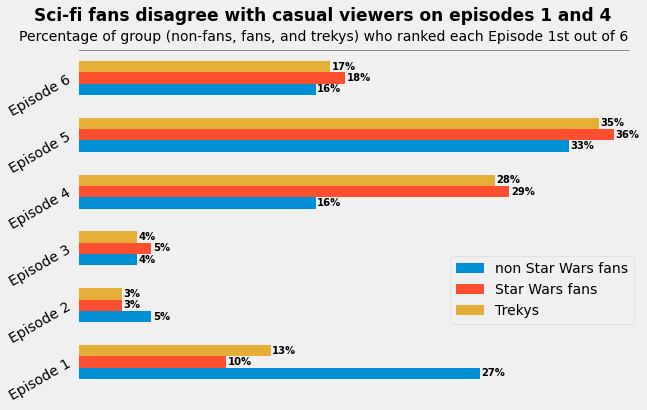

In [77]:
%matplotlib inline
#import plotting libraries and use fivethirtyeight style
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
#________________________________________________________
#Initialize dictionaries for plotting
number_of_favorites = {}
number_of_favorites_fans = {}
number_of_favorites_treky = {}
df_seen = df.loc[df.loc[:,'seen_any'],:]        #Filter DataFrame to those who have seen a movie
#________________________________________________________
#Compute number of rank == 1 for each movie, for each group
for col in rank_cols:
    number_of_favorites['Episode ' + col[-1]] = df_seen.loc[
        ~df_seen.loc[:,'fan'] & (df_seen.loc[:,col] == 1), col].sum()         #Filter non fans and rank == 1 and count them

    number_of_favorites_fans['Episode ' + col[-1]] = df_seen.loc[
        df_seen.loc[:,'fan'] & (df_seen.loc[:,col] == 1), col].sum()

    number_of_favorites_treky['Episode ' + col[-1]] = df_seen.loc[
        df_seen.loc[:,'treky'] & (df_seen.loc[:,col] == 1), col].sum()
#________________________________________________________
x = list(number_of_favorites.keys())    #x axis for plotting
#create normalized list with proportion of group who selected each movie as favorite
y_1 = list(number_of_favorites.values())/sum(list(number_of_favorites.values())) 
y_2 = list(number_of_favorites_fans.values())/sum(list(number_of_favorites_fans.values()))
y_3 = list(number_of_favorites_treky.values())/sum(list(number_of_favorites_treky.values()))
#convert to percentage
y_1 = [int(round(100*x,0)) for x in y_1]
y_2 = [int(round(100*x,0)) for x in y_2]
y_3 = [int(round(100*x,0)) for x in y_3]
#___________________________________________________________
#code for plotting
fig, ax = plt.subplots(figsize=(9, 6))

#___________________________________________________________

x_axis = np.arange(len(x)) #numeric axis for shifting plots
#Create the three bar plots 
ax.barh(x_axis - 0.2, y_1, 0.2, label = 'non Star Wars fans')
ax.barh(x_axis, y_2, 0.2, label = 'Star Wars fans')
ax.barh(x_axis + 0.2, y_3, 0.2,label = 'Trekys' )
ax.set_yticks(x_axis,x)        #add in proper labels
#___________________________________________________________
#basic graph asthetics 
ax.legend(loc='center left', bbox_to_anchor=(.65, 0.3))     #place legend
ax.grid(visible = False)    #remove gridline
ax.yaxis.set_tick_params(rotation = 30) #rotate x labels
ax.set_xticklabels([])      #remove x axis ticks
#___________________________________________________________
#Insert graph title and subtext
ax.text(-2.9,6, 'Sci-fi fans disagree with casual viewers on episodes 1 and 4', weight = 'bold', size = 17)
ax.text(-3.9,5.65, 'Percentage of group (non-fans, fans, and trekys) who ranked each Episode 1st out of 6')
ax.axhline(5.5, color='grey', linewidth=1, alpha=0.9,
           xmin=-6, xmax=0.98)
#___________________________________________________________
#place quantities of each bar next to them
for i, v in enumerate(y_1):
    ax.text(v+.1, i-.2, str(v)+'%', color='black', fontweight='bold', fontsize=10, ha='left', va='center')
for i, v in enumerate(y_2):
    ax.text(v+.1, i, str(v)+'%', color='black', fontweight='bold', fontsize=10, ha='left', va='center')
for i, v in enumerate(y_3):
    ax.text(v+.1, i+.2, str(v)+'%', color='black', fontweight='bold', fontsize=10, ha='left', va='center')

Interestingly, we see that while a similar percentage of fans, non-fans and trekys rated episodes 6,5,3, and 2 as the best star wars movie, a much higher percentage of non-fans rated epsidoe 1 their favorite. Similarly, a much higher percentage of star-wars fans and star trek fans rated episode 4 as their favorite. Regardless, we see that episode 5 remains the favorite across each group. 

In the following code cell, we'll create a plot investigating how Jar-Jar dislike compares with income. In particular, for each income group, we'll compare the percentage of an income group who rated Jar Jar unfavorably to the percentage of that group who rated Palpatine, the primary villain of all six movies, unfavorably. 

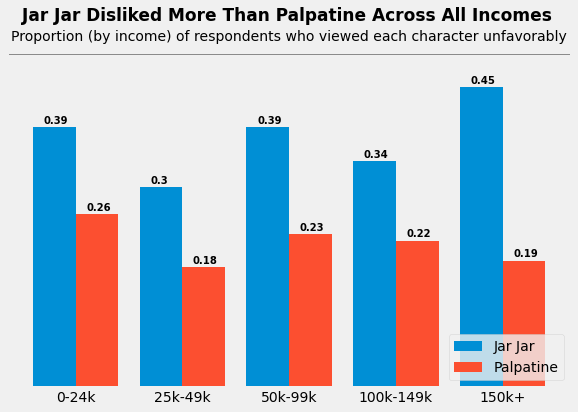

In [78]:
#filter income DataFrame to only those who have seen a movie
df_income_and_seen = df_income_reported.loc[df_income_reported.loc[:,'seen_any'],:]
by_income = df_income_and_seen.groupby('income') #group by income
#initialize dictionaries for plotting
unfavorable_jar_jar = {}
unfavorable_palpatine = {}
#________________________________________________________________________
#loop through each income value, and compute unfavorability sum for jar jar, palpatine
for income in df_income_reported['income'].value_counts().index.to_list(): #for each income
    unfavorable_jar_jar[income] = sum(                                          #add up very unfavorably and somewhat unfavorably proportions
                                        by_income.get_group(income)             #get to DataFrame of individuals with given income
                                            .loc[:,'jar_jar_vibe']              #look only at Jar Jar column
                                                .value_counts(normalize=True)[
                                                    ['very unfavorably', 'somewhat unfavorably']] #look only at unfavorable proportions
                                                        .to_list())
    #same as above but for Palpatine
    unfavorable_palpatine[income] = sum(
                                        by_income.get_group(income)
                                            .loc[:,'palpatine_vibe']
                                                .value_counts(normalize=True)[['very unfavorably', 'somewhat unfavorably']]
                                                    .to_list())
                            
#_______________________________________________________________________
#Use dictionaries to lists with ascending income brackets
income_ordered = ['0-24k','25k-49k','50k-99k','100k-149k','150k+']
unfav_jar_jar = [round(unfavorable_jar_jar[k],2) for k in income_ordered]
unfav_palpatine = [round(unfavorable_palpatine[k],2) for k in income_ordered]
#________________________________________________________________________
#code for plotting

fig, ax = plt.subplots(figsize=(9, 6))

x_axis = np.arange(len(income_ordered))     #create numeric axis for purpose of shifting

#create bar plots
ax.bar(x_axis - 0.2, unfav_jar_jar, .4, label = 'Jar Jar')
ax.bar(x_axis + 0.2, unfav_palpatine, .4, label = 'Palpatine')
#__________________________________________________________________________

ax.set_xticks(x_axis, income_ordered)       #set tick labels with income brackets
ax.grid(visible = False)                    #remove grid and yticklabels
ax.set_yticklabels([])

ax.legend(loc = 'lower right')              #create legend
#__________________________________________________________________________
#Generate title and subtext
ax.text(-0.5,.55, 'Jar Jar Disliked More Than Palpatine Across All Incomes', weight = 'bold', size = 17)
ax.text(-0.6,.52, 'Proportion (by income) of respondents who viewed each character unfavorably')
ax.axhline(.50, color='grey', linewidth=1, alpha=0.9,
           xmin=-.5, xmax=1)
#___________________________________________________________________________
#Place proportion values above bars
for i, v in enumerate(unfav_jar_jar):
    ax.text(i-.3, v+.01, str(v), color='black', fontweight='bold', fontsize=10, ha='left', va='center')
for i, v in enumerate(unfav_palpatine):
    ax.text(i+.1, v+.01, str(v), color='black', fontweight='bold', fontsize=10, ha='left', va='center')

We see that Jar Jar is universally disliked more than Palpatine by all incomes. Interestingly, Jar Jar dislike is strongest for those respondents who make 150k+ per year. 

Next, we make a similar plot that's a bit more informative. Namely, we study the favorability/unfavorability percentage for each character. We split this analysis into fans and non-fans, thinking we may see some interesting difference as we did in the first plot. 

![jar jar](photos/giphy%20jar%20jar.gif)

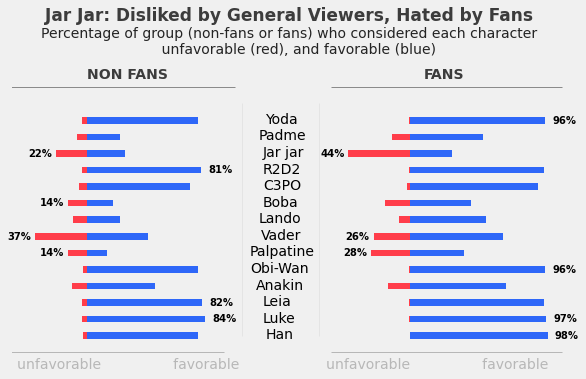

In [81]:
#Initialize dictionaries and DataFrames for Plotting
favorability = {}
unfavorability = {}
favorability_fan = {}
unfavorability_fan = {}
df_seen = df.loc[df.loc[:,'seen_any'],:] #restrict to only respondents who have seen a star wars film
#____________________________________________________
#Compute unfavorability scores for fans and nonfans for each character
for character in vibe_cols:
    favorability[character] = round(
        sum(df_seen.loc[                                        #add up very favorably and somewhat favorably proportions
            ~df_seen.loc[:,'fan'],character]                    #filter to only nonfans
                .value_counts(normalize=True)[                     
                    ['very favorably', 'somewhat favorably']]   #compute each proportion 
                        .to_list())                             
                            ,2)                                 #round to two decimal places

    unfavorability[character] = round(                          #same as above, for unfavorability of non fans
        -1*sum(df_seen.loc[
            ~df_seen.loc[:,'fan'],character]
                .value_counts(normalize=True)[
                    ['very unfavorably', 'somewhat unfavorably']]
                        .to_list()) 
                            ,2)
#___________________________________________________________
#Same as above, only filtering for fans instead of nonfans
    favorability_fan[character] = round(
        sum(df_seen.loc[
            df_seen.loc[:,'fan'],character]
                .value_counts(normalize=True)[
                    ['very favorably', 'somewhat favorably']]
                        .to_list()) 
                            ,2)


    unfavorability_fan[character] = round( 
        -1*sum(df_seen.loc[
            df_seen.loc[:,'fan'],character]
                .value_counts(normalize=True)[
                    ['very unfavorably', 'somewhat unfavorably']]
                        .to_list()) 
                            ,2)
#_____________________________________________________________
#Codes for plotting

fig, ax = plt.subplots(figsize=(9, 5))

x = list(favorability.keys()) 
x_axis = np.arange(len(x))              #make numeric axis to be shifted

#______________________________________________________________
#generate the 4 horizontal bar plots

ax.barh(x_axis,favorability.values(), 0.4, label = 'General', color = '#2E67F8')
all_unfav = ax.barh(x_axis,unfavorability.values(), 0.4, label = 'General', color = '#FF3D4A')
ax.barh(x_axis,favorability_fan.values(), 0.4, label = 'Fan',left = 2.3, color = '#2E67F8')
ax.barh(x_axis,unfavorability_fan.values(), 0.4, label = 'Fan',left = 2.3, color = '#FF3D4A')

#______________________________________________________________
#Remove grid and tick labels

ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])

#______________________________________________________________
#Coordinates for placing character names
x_coords = {'Yoda': 1.07+0.2, 'Padme': 1.02+0.2, 'Jar jar': 1.05+0.2,
            'R2D2': 1.05+0.2, 'C3PO': 1.05+0.2,
            'Boba': 1.05+0.2, 'Lando': 1.02+0.2,
            'Vader': 1.04+0.2, 'Palpatine': 0.96+0.2,
            'Obi-Wan': 0.96+0.2, 'Anakin': 1+0.2,
            'Leia': 1.05+0.2, 'Luke': 1.05+0.2,
            'Han': 1.07+0.2 }
y_coord = 12.8
for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)          #for each (name, coordinate) place name at coordinate
    y_coord -= 1

#place vertical lines on either side of centered character names
ax.axvline(x= 0.2+0.9,ymin = .1, ymax = .9, alpha = .1, c = 'grey', lw = 1)
ax.axvline(x= 0.2+1.45,ymin = .1, ymax = .9, alpha = .1, c = 'grey', lw = 1)

#________________________________________________________________
     
#Horizontal line and labels on bottom of each plot
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=-0.03, xmax=0.38)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.57, xmax=0.98)

ax.text(-0.5, -2, 'unfavorable'+ ' '*16 + 'favorable',
        color='grey', alpha=0.5)
ax.text(1.7, -2, 'unfavorable'+ ' '*16 + 'favorable',
        color='grey', alpha=0.5)
#__________________________________________________________________

#Horizontal line and labels on top of each plot
ax.axhline(15, color='grey', linewidth=1, alpha=0.9,
           xmin=0.57, xmax=0.98)

ax.axhline(15, color='grey', linewidth=1, alpha=0.9,
           xmin=-.03, xmax=0.4)

ax.text(0,15.5, 'NON FANS',weight = 'bold', alpha = .75)
ax.text(2.4,15.5,'FANS', weight = 'bold', alpha = .75)
#__________________________________________________________________
#Title and subtext explaining plot
ax.text(-0.3,19, 'Jar Jar: Disliked by General Viewers, Hated by Fans', weight = 'bold', size = 17, alpha = .75)
ax.text(-0.33,18, 'Percentage of group (non-fans or fans) who considered each character', alpha = .85)
ax.text(.5,17, ' unfavorable (red), and favorable (blue)', alpha = .85)
#___________________________________________________________________
#Place quantity near the largest quantities on each plot

#labeling unfavorability non fan values
for i, v in enumerate(unfavorability.values()):
    if abs(v) >= .14:
        ax.text(v-.2, i, str(v)[3:].lstrip('0') + '%', color='black', fontweight='bold', fontsize=10, ha='left', va='center')
    else:
        pass
#labeling unfavorability for fans
for i, v in enumerate(unfavorability_fan.values()):
    if abs(v) >= .20:
        ax.text(v + 2.1, i, str(v)[3:].lstrip('0') + '%', color='black', fontweight='bold', fontsize=10, ha='left', va='center')
    else:
        pass
#labeling favorability for non fans
for i, v in enumerate(favorability.values()):
    if abs(v) >= .80:
        ax.text(v+.05, i, str(v)[2:]+ '%', color='black', fontweight='bold', fontsize=10, ha='left', va='center') 
    else:
        pass
#labeling favorability for fans
for i, v in enumerate(favorability_fan.values()):
    if abs(v) >= .96:
        ax.text(v + 2.35, i, str(v)[2:] + '%', color='black', fontweight='bold', fontsize=10, ha='left', va='center')
    else:
        pass
#______________________________________________________

plt.show()


We see that among non-fans, Darth Vader is actually viewed most unfavorably, while for fans Jar Jar is far and away viewed most unfavorably. 

![vader](photos/star-wars-darth-vader.gif)

The last two plots, we'll investigate some differences of respondents by region. We'll be using geopandas to generate the plots. The usa-states-census data was downloaded from [here](https://github.com/joncutrer/geopandas-tutorial). For a great tutorial on the basics of geopandas, take a look [here](https://jcutrer.com/python/learn-geopandas-plotting-usmaps?adlt=strict&toWww=1&redig=0B91849E47D349E18799F27D8A8D79BE). 

In the following code cell, we import geopandas and create DataFrames corresponding to each census region. 

In [80]:
#import library for US map plots, and read in data with US state shapes
import geopandas
states = geopandas.read_file('data/usa-states-census-2014.shp')
#______________________________________________________________________
#Create lists corresponding to the nine census regions
west_south_central_states = ['TX','OK','AR','LA']
east_south_central_states = ['MS','AL','TN','KY']
south_atlantic_states = ['FL','GA','SC','NC','VA','WV','DC','MD','DE']

middle_atlantic_states = ['PA','NJ','NY']
new_england_states = ['CT','RI','MA','VT','NH','ME']
east_north_central_states = ['IL','IN','OH','MI','WI']

west_north_central_states = ['ND','SD','NE','KS','MO','IA','MN']
mountain_states = ['NV','AZ','UT','CO','NM','WY','MT','ID']
pacific_states = ['CA','OR','WA','AK']
#_____________________________________________________________________
#Use above lists to create nine sub DataFrames corresponding to each census region
west_south_central = states.loc[states.loc[:,'STUSPS'].isin(west_south_central_states),:]
east_south_central = states.loc[states.loc[:,'STUSPS'].isin(east_south_central_states),:]
south_atlantic = states.loc[states.loc[:,'STUSPS'].isin(south_atlantic_states),:]

middle_atlantic = states.loc[states.loc[:,'STUSPS'].isin(middle_atlantic_states),:]
new_england = states.loc[states.loc[:,'STUSPS'].isin(new_england_states),:]
east_north_central = states.loc[states.loc[:,'STUSPS'].isin(east_north_central_states),:]

west_north_central = states.loc[states.loc[:,'STUSPS'].isin(west_north_central_states),:]
mountain = states.loc[states.loc[:,'STUSPS'].isin(mountain_states),:]
pasific = states.loc[states.loc[:,'STUSPS'].isin(pacific_states),:]



Now, we're ready to add columns corresponding to what we want to plot to the regional dataframes. We'll be looking at the percentage of each region that indicated that they are a star wars fan. We'll also look more at Jar Jar unfavorability, but this time as a percentage of each region. Once we add this data in, we'll combine everything into one big DataFrame. 

In [81]:
#initialize dictionaries for plotting
fan_percentage_by_region = {}
unfav_score_by_region = {}
#for each census region, compute percentage of fans and percentage who view jar jar unfavorably
for region in df['location'].value_counts().index.to_list():
    fan_percentage_by_region[region] = round(
        df_seen.groupby('location')
        .mean()
            .loc[:,'fan'][region]
                ,2)

    unfav_score_by_region[region] =  round(
        df_seen.groupby('location')
            ['jar_jar_vibe'].value_counts(normalize = True)
                [region]['very unfavorably'] + df_seen.groupby('location')
            ['jar_jar_vibe'].value_counts(normalize = True)
            [region]['somewhat unfavorably']
                ,2)
#_________________________________________________________________________________________________________
#Create a new column in each DataFrame giving each region their jar jar unfavorability score
mountain.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['mountain']
new_england.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['new england']
west_north_central.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['west north central']

east_north_central.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['east north central']
west_south_central.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['west south central']
pasific.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['pacific']

east_south_central.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['east south central']
middle_atlantic.loc[:, 'jar_jar_unfav_score'] = unfav_score_by_region['middle atlantic']
south_atlantic.loc[:,'jar_jar_unfav_score'] = unfav_score_by_region['south atlantic']
#______________________________________________________________________________________
#Create a new column in each DataFrame giving each region their fan percentage score
mountain.loc[:,'fan_percentage'] = fan_percentage_by_region['mountain']
new_england.loc[:,'fan_percentage'] = fan_percentage_by_region['new england']
west_north_central.loc[:,'fan_percentage'] = fan_percentage_by_region['west north central']

east_north_central.loc[:,'fan_percentage'] = fan_percentage_by_region['east north central']
west_south_central.loc[:,'fan_percentage'] = fan_percentage_by_region['west south central']
pasific.loc[:,'fan_percentage'] = fan_percentage_by_region['pacific']

east_south_central.loc[:,'fan_percentage'] = fan_percentage_by_region['east south central']
middle_atlantic.loc[:,'fan_percentage'] = fan_percentage_by_region['middle atlantic']
south_atlantic.loc[:,'fan_percentage'] = fan_percentage_by_region['south atlantic']
#_________________________________________________________________________________________
#Combine DataFrames back into a single frame

frames = [mountain,new_england,west_north_central,
        east_north_central,west_south_central,pasific,
        east_south_central,middle_atlantic,south_atlantic]

states_percentage = pd.concat(frames)


/home/peopl/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/peopl/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/peopl/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Now the DataFrame containing the map data is complete, and we can use geopandas to generate the plots we need. 

Text(-98, 32, '70%')

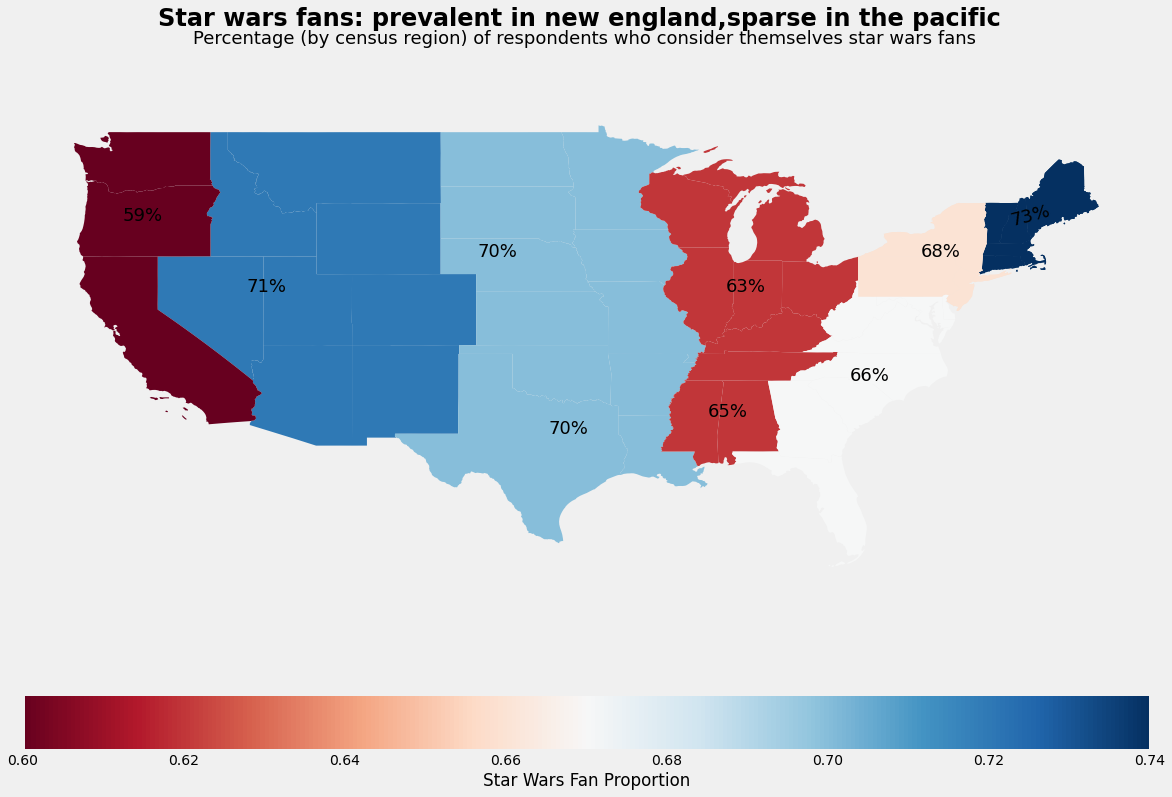

In [82]:
#plot fan percentage
fig,ax = plt.subplots(figsize = (18,12))
states_percentage.plot(ax = ax, column = 'fan_percentage', cmap = 'RdBu', legend = True, legend_kwds={'label': "Star Wars Fan Proportion",
                        'orientation': "horizontal"}, linewidth = .5)
#____________________________________________________
#Remove grid and ticks
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])
#____________________________________________________
#add title and subtext
ax.text(-120,55, 'Star wars fans: prevalent in new england,sparse in the pacific', weight = 'bold', size = 24)
ax.text(-118,54, 'Percentage (by census region) of respondents who consider themselves star wars fans', size = 18)
#____________________________________________________
#add percentage labels
ax.text(-122,44,'59%', size = 18)
ax.text(-115,40,'71%', size = 18)
ax.text(-102,42,'70%', size = 18)
ax.text(-88,40,'63%', size = 18)
ax.text(-72,43.75, '73%', size = 18,rotation = 15)
ax.text(-77,42, '68%', size = 18)
ax.text(-81,35, '66%', size = 18)
ax.text(-89,33, '65%', size = 18)
ax.text(-98,32,'70%', size = 18)


We see that those from the pacific region are much less likely to be star wars fans, while star wars fandom is particularly prevalent in New England. Such a gap in fan percentage between the pacific mountain regions is particularly interesting, since these regions are adjacent. 

Text(-98, 32, '33%')

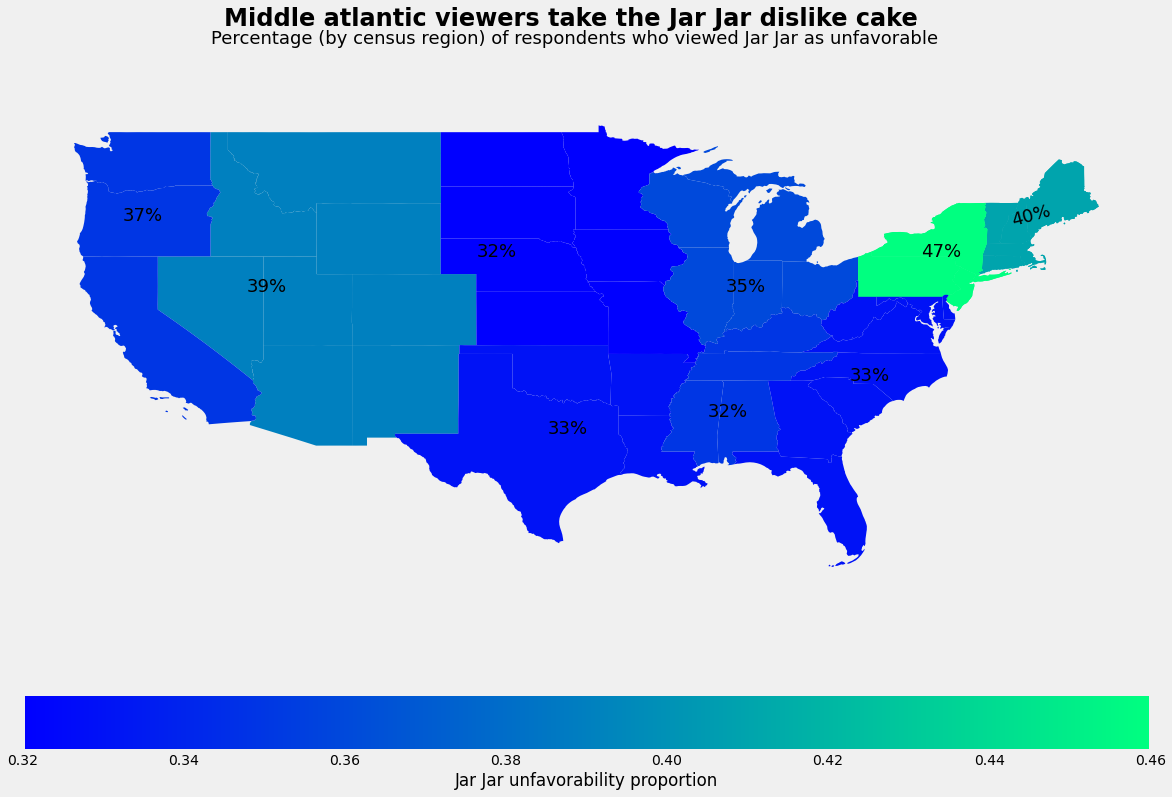

In [83]:
fig,ax = plt.subplots(figsize = (18,12))
states_percentage.plot(ax = ax, column = 'jar_jar_unfav_score', cmap = 'winter', legend = True, legend_kwds={'label': "Jar Jar unfavorability proportion",
                        'orientation': "horizontal"}, linewidth = .5)
#________________________________
#Remove grid and tick labels
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])
#_________________________________
#Title and subtext
ax.text(-116.25,55, 'Middle atlantic viewers take the Jar Jar dislike cake', weight = 'bold', size = 24)
ax.text(-117,54, 'Percentage (by census region) of respondents who viewed Jar Jar as unfavorable', size = 18)
#_________________________________
#percentage labels
ax.text(-122,44,'37%', size = 18)
ax.text(-115,40,'39%', size = 18)
ax.text(-102,42,'32%', size = 18)
ax.text(-88,40,'35%', size = 18)
ax.text(-72,43.75, '40%', size = 18,rotation = 15)
ax.text(-77,42, '47%', size = 18)
ax.text(-81,35, '33%', size = 18)
ax.text(-89,33, '32%', size = 18)
ax.text(-98,32,'33%', size = 18)


We see that the top three regions in star wars fandom also lead the way is Jar Jar dislike. This makes sense considering our previous plot showing that star wars fans are almost twice as likely to dislike Jar Jar when compared to non-fans. The sharp difference between the middle atlantic region and the other regions is quite interesting. Additionally, the fact that many central regions have comparatively lower dislike of Jar Jar is consistent with a common stereotype of friendliness within these regions. 

# Conclusion 

In conclusion, we found, after carefully cleaning the data, that the consensus favorite star wars movie among the respondents is "Episode V: The Empire Strikes Back." Sci-fi fans, however, also found Episode IV near and dear to their heart, while non-fans preferred Episode I. We also investigated how Jar Jar dislike varies with income, fan status, and region. We found that those who make 150k+ per year were most likely to dislike Jar Jar, as were fans, and those living in the mountain, middle atlantic, and new england regions. These regions are also high in fan percentage, which lines up with previous analysis regarding fan dislike of Jar Jar.

I hope you enjoyed this notebook! May the force be with you. 

![force be with you](photos/giphy.gif)